# Example how you do fitting to the real data. 
Let's try to get data for spread of coronavirus in the Netherlands (you can take similar data for you country of interest).
For Dutch population we have a wiki page on
https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_the_Netherlands
I skip detail of how you make the input file. You will need the table of new cases per day. The rest is optional. at the moment of writing I have data from February 27 till March 13.
For this script we only need a column "total per day", meaning new cases for every day.

In [6]:
import matplotlib.pyplot as plt
from scipy import stats

per_day=[1,1,4,3,10,5,14,44,46,60,76,57,61,121,111,190] #new cases per day
#find cumulative number of sick in these days
cum=[per_day[0]]
for i in range(1,len(per_day)):
   cum.append(per_day[i]+cum[-1])
print("cumulative:", cum)

cumulative: [1, 2, 6, 9, 19, 24, 38, 82, 128, 188, 264, 321, 382, 503, 614, 804]


you can compare cumulative values with table data in wiki, in a good case it will be the same. For simplicity, let's make a function which will return data on linear fit for any give interval of data.

In [9]:
#make linear fit function
#note I reserve a possibility to skip first n values
def get_line(y, skip, predict):
    data=y[skip:]
#    print("input data", data)
    days=[x+skip for x in range(len(data))]
    slope, intercept, r_value, p_value, std_err = stats.linregress(days,data)
 #   print("slope, intercept", slope, intercept)
    new=[]
    for x in range(len(y)):
        new.append(x*slope+intercept)
    predicted=predict*slope+intercept
    return(new, predicted)

Now let's try to do linear fit to our data. Obviously it will not work well.

In [18]:
lin_per_day, lin16d=get_line(per_day,6,16)
lin_cum, lin16c=get_line(cum,6,16)
#print predicted cases for new and cumulative counts, day 16
print("new day 16:", int(lin16d))
print("total day 16:", int(lin16c))


new day 16: 158
total day 16: 770


Let's see how line fits to the data

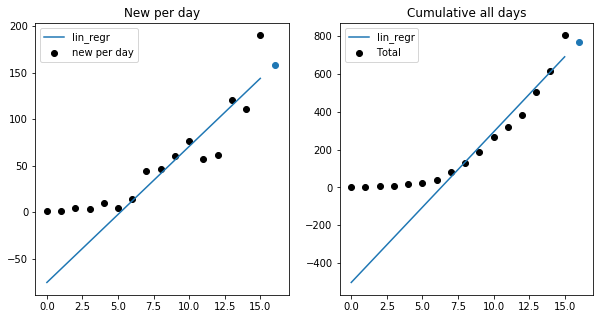

In [19]:

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("New per day")
plt.scatter(range(len(per_day)),per_day, c="black")
plt.scatter(16,lin16d)
plt.plot(range(len(lin_per_day)),lin_per_day)
plt.legend(["lin_regr","new per day"])
plt.subplot(122)
plt.title("Cumulative all days")
plt.scatter(range(len(cum)),cum, c="black")
plt.plot(range(len(lin_cum)),lin_cum)
plt.scatter(16,lin16c)
plt.legend(["lin_regr","Total"])

Note, full set of data does not fit to the linear approximation and all. Therefore return to the block13, and set skip value to the number you like more. Right now I would set it to 5 or 6.
Note, that linear approximation will always underestimate the the trend, although predictions for a few days ahead will work quite well. You can further modify the script to predict the last known value and make judgement whether linear prediction goes below or above the last known value. It will rouphly mean that we are still accelerating in the pandemy, or (fortunately) slowing down. Right now there are no signs of slowing down.